The Air Quality Index (AQI) is a vital tool used to assess the quality of the air we breathe based on various pollutants present in the atmosphere. It categorizes air quality into six distinct buckets, each with a specific range of AQI values, associated symptoms, potential diseases, and recommended precautions.
1. Good (0-50): - AQI in this range indicates excellent air quality. - No significant symptoms expected. - Lower risk of respiratory diseases. - No specific precautions required, enjoy outdoor activities.
2. Satisfactory (51-100): - Air quality is acceptable, though slight pollution may be present. - Minor irritations for sensitive individuals. - Precautions: Sensitive individuals should limit outdoor exposure.
3. Moderate (101-200): - Moderate air quality with increased pollutants. - Respiratory discomfort for some. - Precautions: Reduce outdoor activities, wear masks if necessary.
4. Poor (201-300): - Poor air quality with visible pollutants. - Increased risk of respiratory illnesses. - Precautions: Minimize outdoor exposure, wear masks, and use air purifiers indoors.
5. Very Poor (301-400): - Very poor air quality, hazardous to health. - Severe respiratory symptoms. - Precautions: Stay indoors, wear masks, and use air purifiers.
6. Severe (401-2500): - Extremely severe air pollution, life-threatening. - Immediate health risks. - Precautions: Stay indoors, use high-efficiency masks, and seek medical attention if needed. Monitoring the AQI and following recommended precautions can help individuals safeguard their health and make informed decisions regarding outdoor activities during varying air quality conditions


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/city_day.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.shape

(29531, 16)

In [ ]:
df.nunique()

City             26
Date           2009
PM2.5         11716
PM10          12571
NO             5776
NO2            7404
NOx            8156
NH3            5922
CO             1779
SO2            4761
O3             7699
Benzene        1873
Toluene        3608
Xylene         1561
AQI             829
AQI_Bucket        6
dtype: int64

**Handling Null values and removing unesscary columns**

In [ ]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [ ]:
df['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [ ]:
df = df.dropna(subset=['AQI'])

In [ ]:
df = df.reset_index()

In [ ]:
feature_drop = ['PM10','NH3','Benzene','Toluene','Xylene','index']
df = df.drop(df[feature_drop],axis=1)
df.head()

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI,AQI_Bucket
0,Ahmedabad,2015-01-29,83.13,6.93,28.71,33.72,6.93,49.52,59.76,209.0,Poor
1,Ahmedabad,2015-01-30,79.84,13.85,28.68,41.08,13.85,48.49,97.07,328.0,Very Poor
2,Ahmedabad,2015-01-31,94.52,24.39,32.66,52.61,24.39,67.39,111.33,514.0,Severe
3,Ahmedabad,2015-02-01,135.99,43.48,42.08,84.57,43.48,75.23,102.70,782.0,Severe
4,Ahmedabad,2015-02-02,178.33,54.56,35.31,72.80,54.56,55.04,107.38,914.0,Severe


In [ ]:
df['AQI_Bucket'].unique()

array(['Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory', 'Good'],
      dtype=object)

Splitting data according to places (North and South zone)

North - Amritsar, Chandigarh, Delhi, Gurugram, Jaipur, Aizawl, Guwahati, Jorapokhar, Kolkata, Lucknow, Patna, Shillong

South - Amaravati, Bengaluru, Brajrajnagar, Chennai, Coimbatore, Ernakulam, Hyderabad, Kochi, Talcher, Thiruvananthapuram, Visakhapatnam, Ahmedabad, Bhopal, Mumbai

-----------------------------------------------------------------------------

In [ ]:
north = ['Amritsar', 'Chandigarh', 'Delhi', 'Gurugram', 'Jaipur', 'Aizawl', 'Guwahati', 'Jorapokhar', 'Kolkata', 'Lucknow', 'Patna', 'Shillong']
south = ['Amaravati', 'Bengaluru', 'Brajrajnagar', 'Chennai', 'Coimbatore', 'Ernakulam', 'Hyderabad', 'Kochi', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam', 'Ahmedabad', 'Bhopal', 'Mumbai']


df_north = df[df['City'].isin(north)]
df_south = df[df['City'].isin(south)]

In [ ]:
print(df_north['City'].unique())
print(df_south['City'].unique())

['Aizawl' 'Amritsar' 'Chandigarh' 'Delhi' 'Gurugram' 'Guwahati' 'Jaipur'
 'Jorapokhar' 'Kolkata' 'Lucknow' 'Patna' 'Shillong']
['Ahmedabad' 'Amaravati' 'Bengaluru' 'Bhopal' 'Brajrajnagar' 'Chennai'
 'Coimbatore' 'Ernakulam' 'Hyderabad' 'Kochi' 'Mumbai' 'Talcher'
 'Thiruvananthapuram' 'Visakhapatnam']


In [ ]:
print(df_north.isna().sum())
print('------------------')
print(df_south.isna().sum())

City             0
Date             0
PM2.5          530
NO             137
NO2             95
NOx           1777
CO             346
SO2            429
O3             307
AQI              0
AQI_Bucket       0
dtype: int64
------------------
City            0
Date            0
PM2.5         148
NO            250
NO2           296
NOx            80
CO             99
SO2           176
O3            500
AQI             0
AQI_Bucket      0
dtype: int64


In [ ]:
df_north.fillna(df_north.median(), inplace=True)
df_south.fillna(df_south.median(), inplace=True)

<ipython-input-15-f20887b9c59b>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_north.fillna(df_north.median(), inplace=True)
<ipython-input-15-f20887b9c59b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_north.fillna(df_north.median(), inplace=True)
<ipython-input-15-f20887b9c59b>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify 

In [ ]:
df_north = df_north.reset_index()
df_south = df_south.reset_index()

Considering CO, NO, NO2, NOx, SO2, O3, Particulate matter 2.5

-----------------------------------------------------

PM2.5 -
Particulate Matter 2.5-micrometer in ug / m3

NO -
Nitric Oxide in ug / m3

NO2 -
Nitric Dioxide in ug / m3

NOx -
Any Nitric x-oxide in ppb

CO -
Carbon Monoxide in mg / m3

SO2 -
Sulphur Dioxide in ug / m3

O3 -
Ozone in ug / m3

AQI -
Air Quality Index

AQI_Bucket -
Air Quality Index bucket

In [ ]:
df_south.head()

,index,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI,AQI_Bucket
0,0,Ahmedabad,2015-01-29,83.13,6.93,28.71,33.72,6.93,49.52,59.76,209.0,Poor
1,1,Ahmedabad,2015-01-30,79.84,13.85,28.68,41.08,13.85,48.49,97.07,328.0,Very Poor
2,2,Ahmedabad,2015-01-31,94.52,24.39,32.66,52.61,24.39,67.39,111.33,514.0,Severe
3,3,Ahmedabad,2015-02-01,135.99,43.48,42.08,84.57,43.48,75.23,102.70,782.0,Severe
4,4,Ahmedabad,2015-02-02,178.33,54.56,35.31,72.80,54.56,55.04,107.38,914.0,Severe


In [ ]:
df_north.head()

,index,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI,AQI_Bucket
0,1334,Aizawl,2020-03-12,31.21,7.20,1.27,10.65,0.56,4.22,2.81,52.0,Satisfactory
1,1335,Aizawl,2020-03-13,38.39,7.19,0.91,10.37,0.57,4.46,0.18,60.0,Satisfactory
2,1336,Aizawl,2020-03-14,43.23,7.14,1.07,10.48,0.57,4.53,0.41,62.0,Satisfactory
3,1337,Aizawl,2020-03-15,33.82,7.09,0.36,9.73,0.48,4.63,0.30,70.0,Satisfactory
4,1338,Aizawl,2020-03-16,27.14,5.63,2.32,8.09,0.50,4.71,13.02,54.0,Satisfactory


**Univariate Analysis,Bivariate Ananlysis **

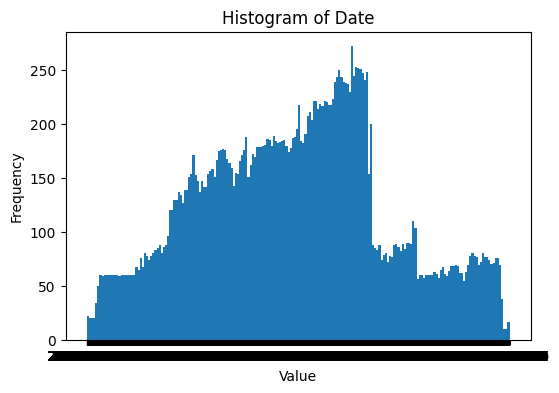

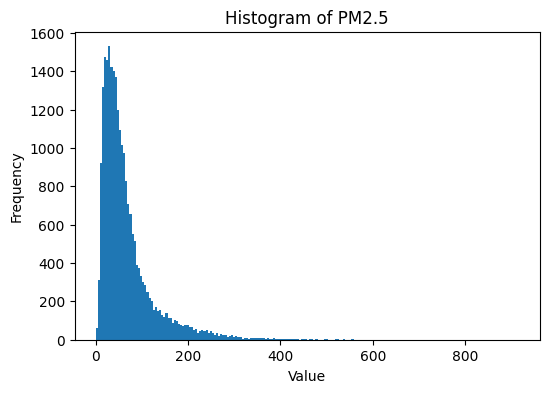

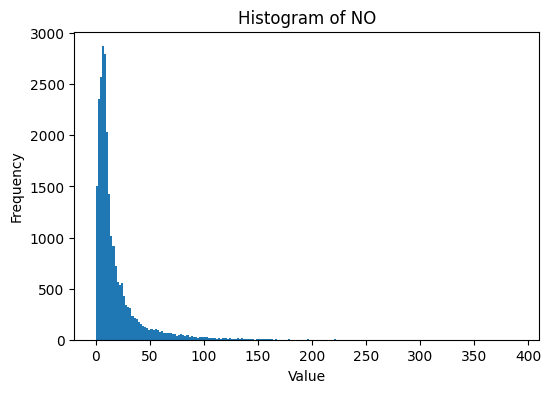

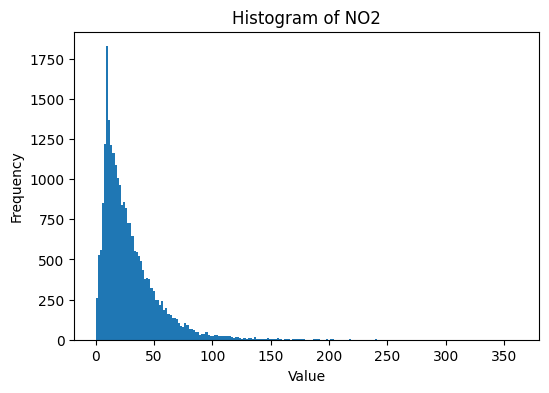

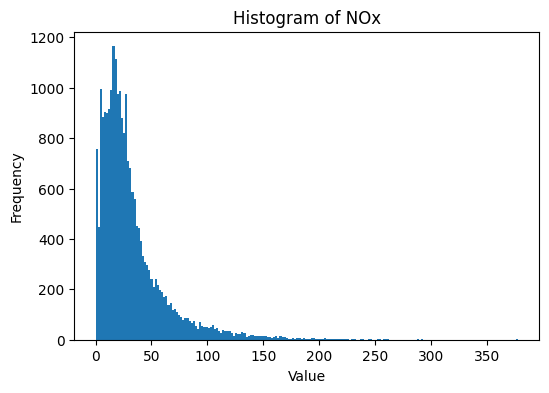

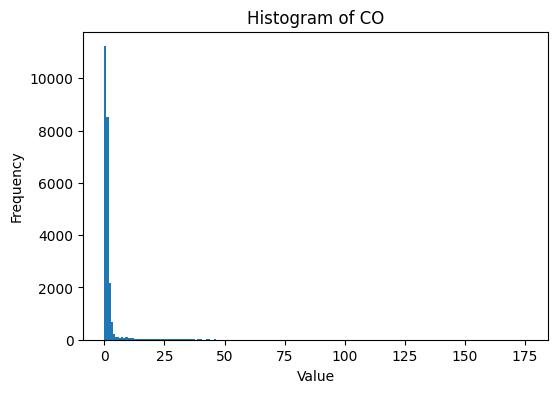

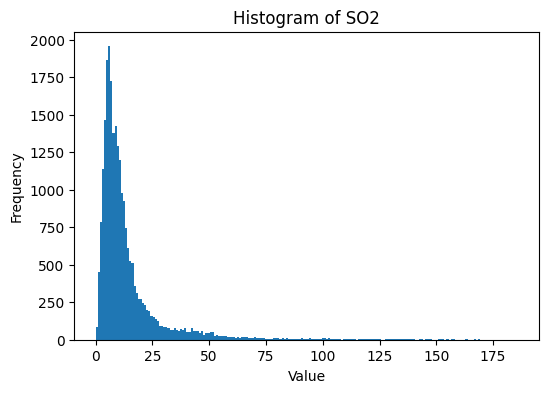

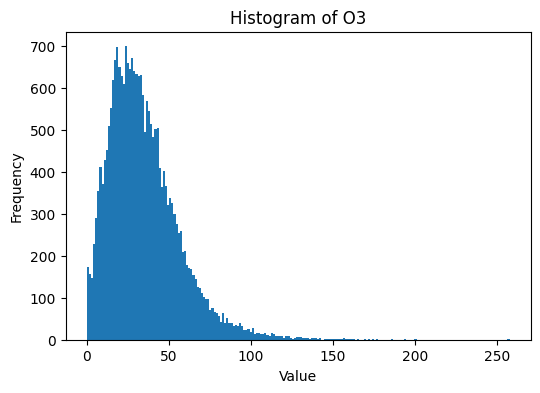

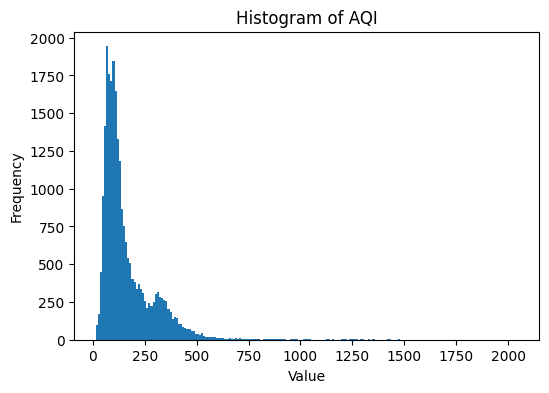

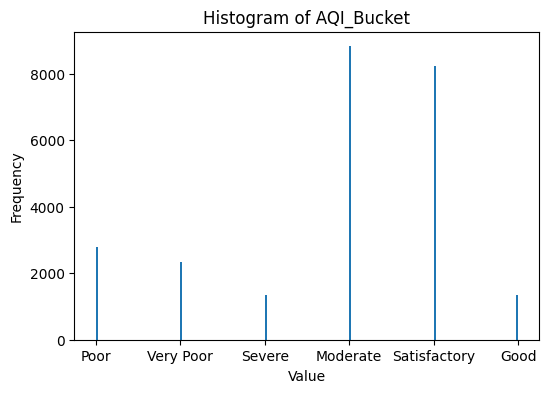

In [ ]:
for column in df_south.iloc[:,2:]:
    plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
    plt.hist(df[column], bins=200)  # Adjust the number of bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

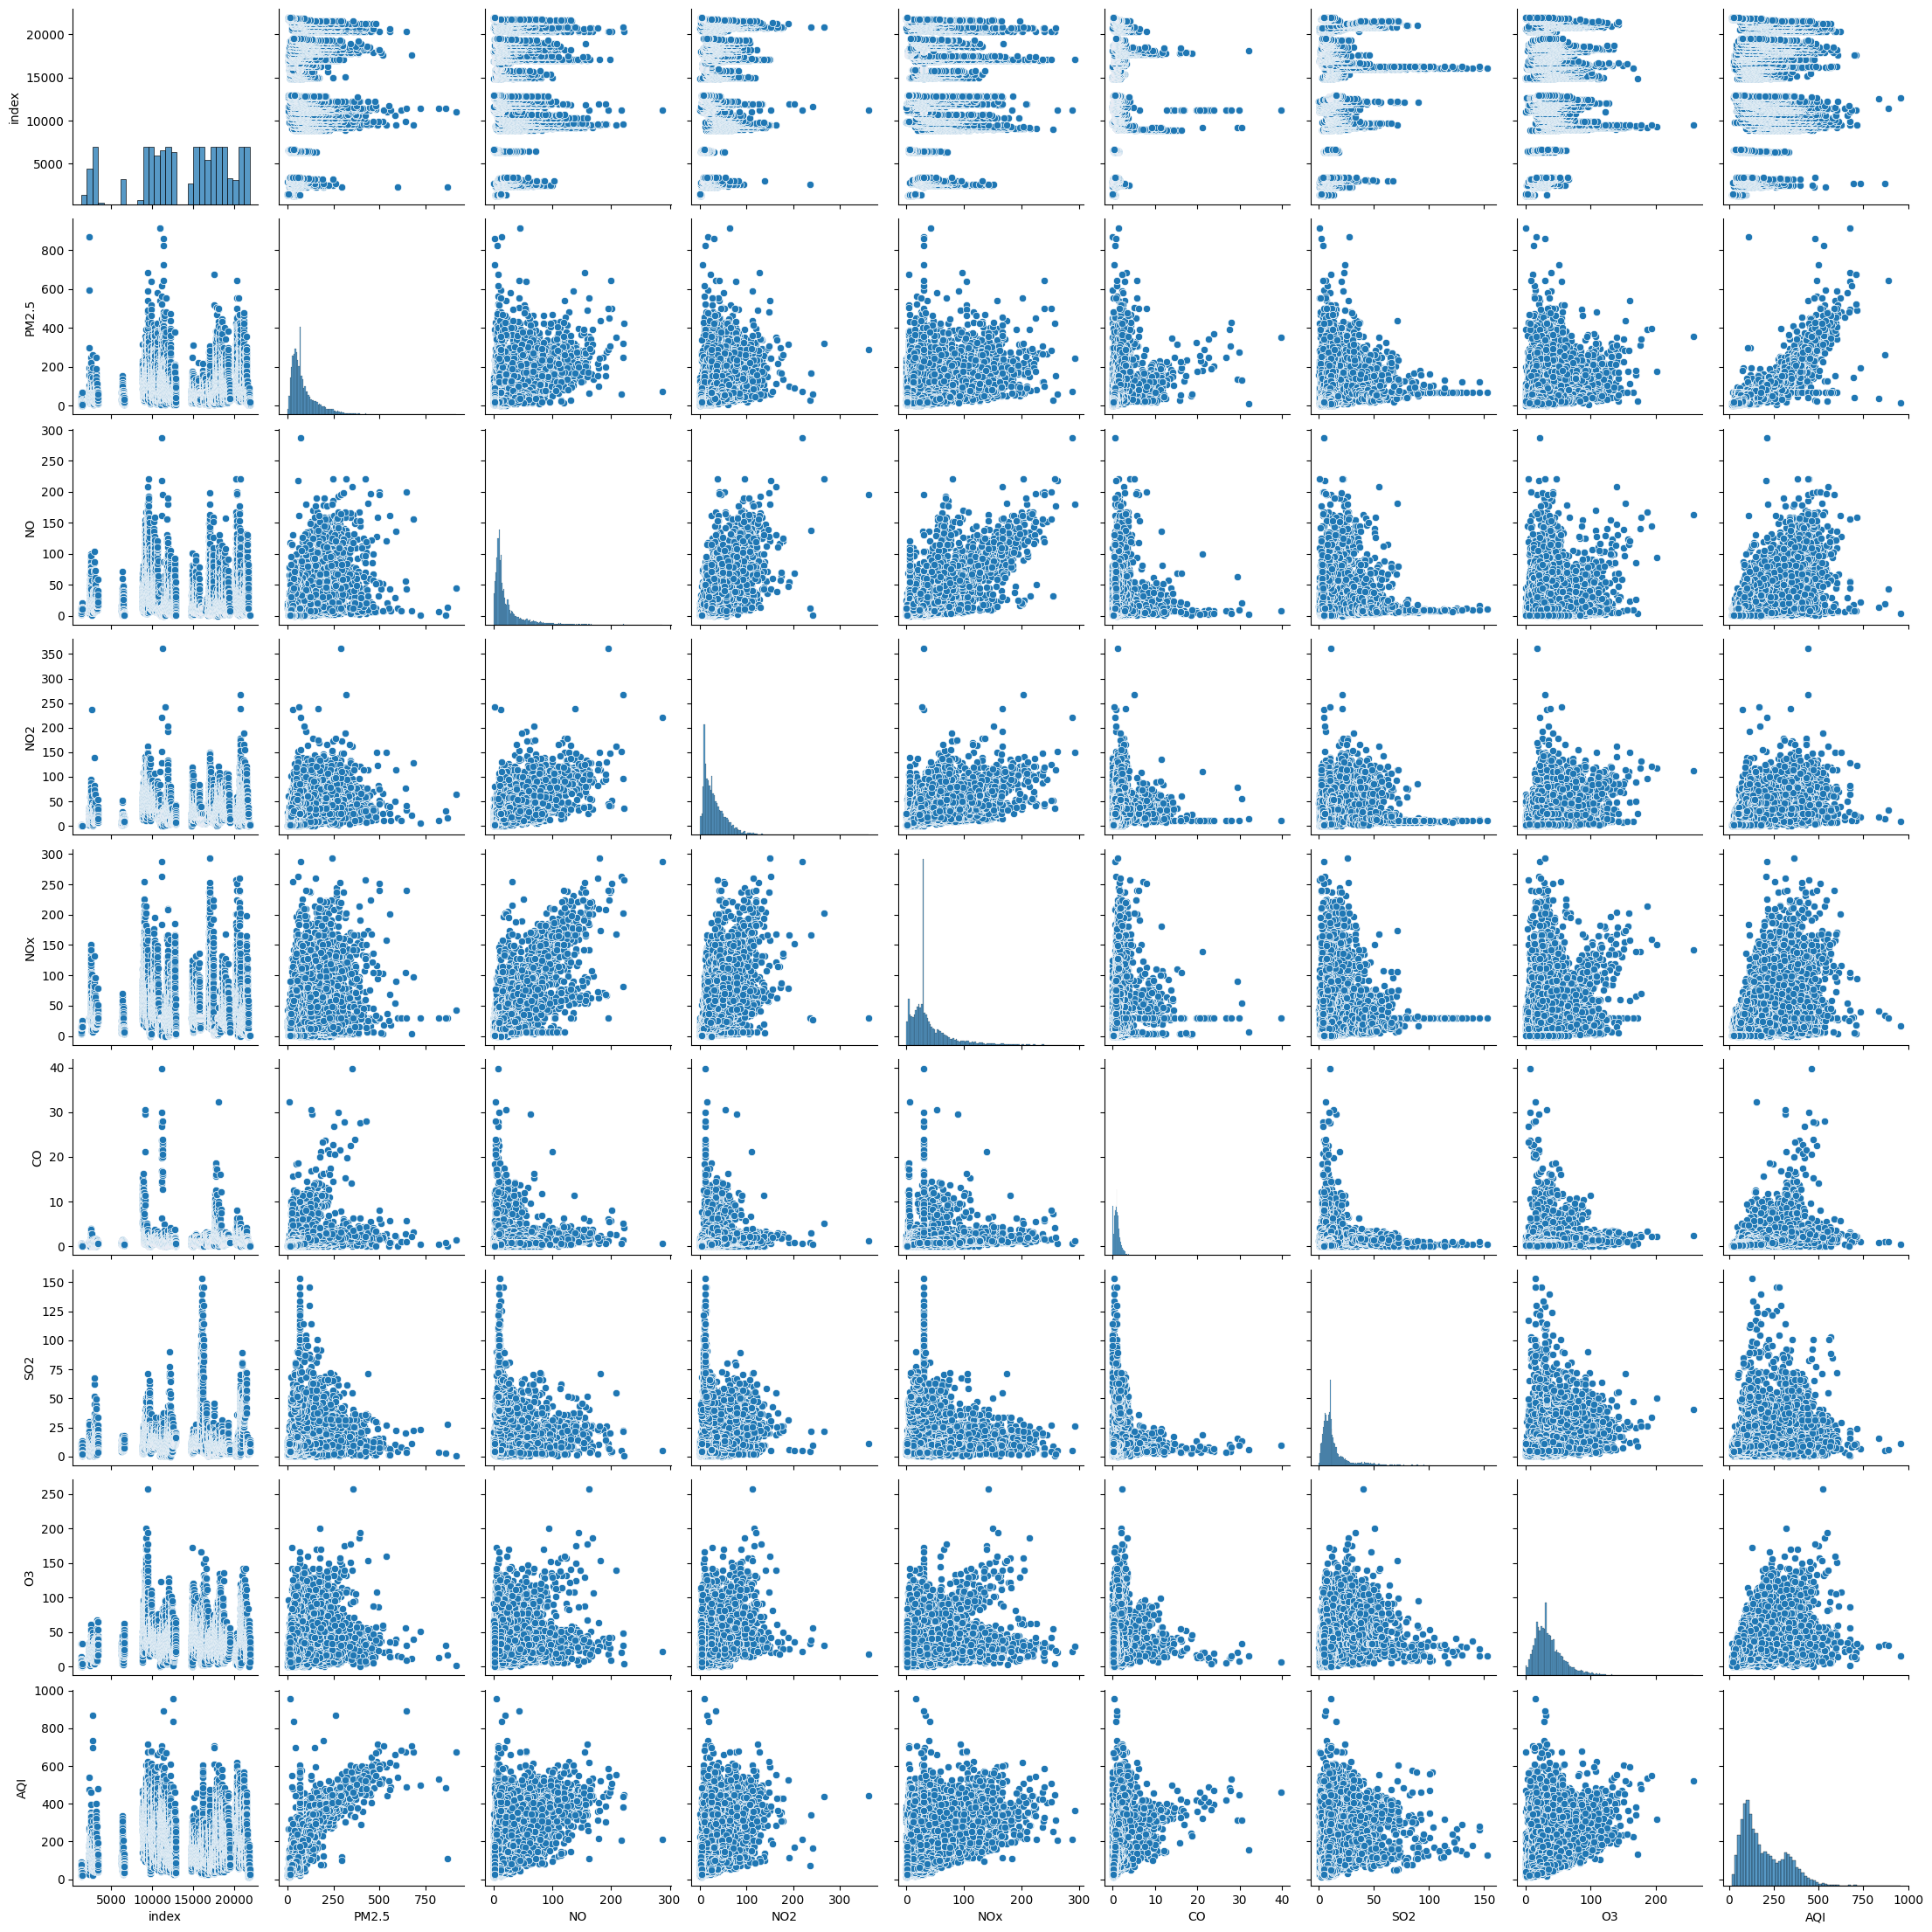

In [ ]:
sns.pairplot(df_north)

<ipython-input-21-6825bb26c9da>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_north.iloc[:,:11].corr(method='pearson', min_periods=1),annot=True)


<Axes: >

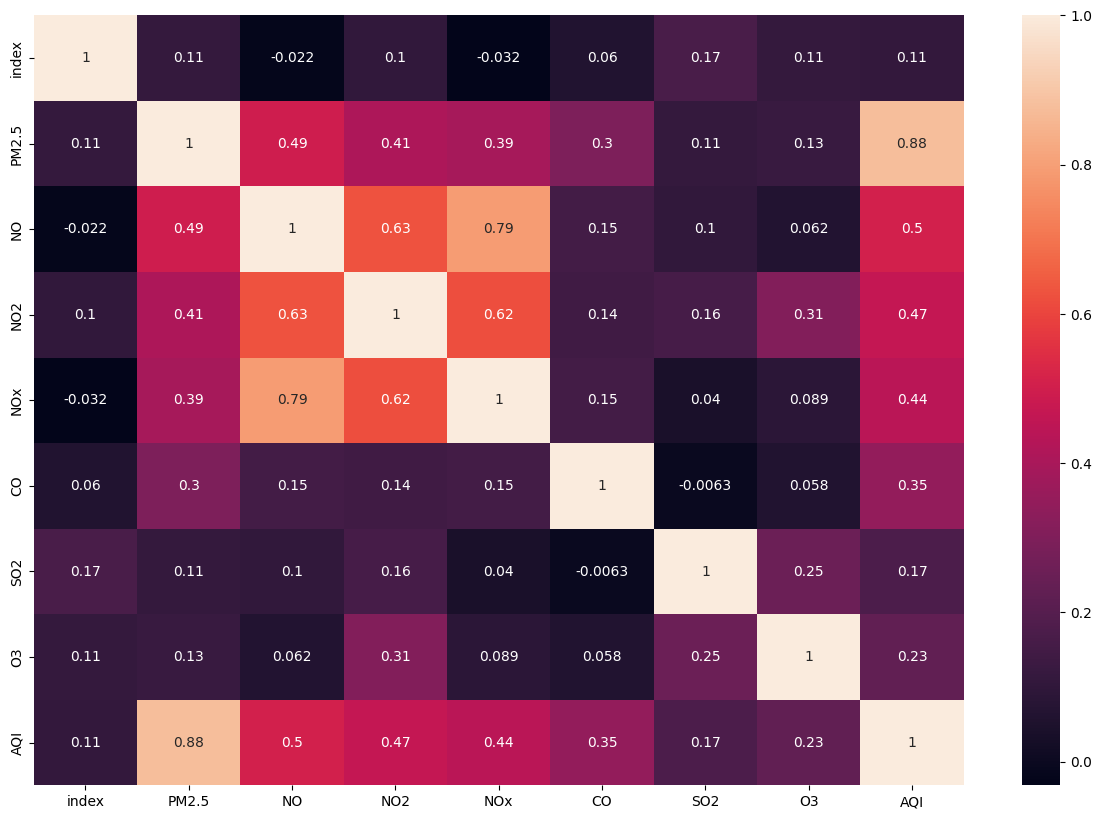

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_north.iloc[:,:11].corr(method='pearson', min_periods=1),annot=True)

In [ ]:
df_north.head()

,index,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI,AQI_Bucket
0,1334,Aizawl,2020-03-12,31.21,7.20,1.27,10.65,0.56,4.22,2.81,52.0,Satisfactory
1,1335,Aizawl,2020-03-13,38.39,7.19,0.91,10.37,0.57,4.46,0.18,60.0,Satisfactory
2,1336,Aizawl,2020-03-14,43.23,7.14,1.07,10.48,0.57,4.53,0.41,62.0,Satisfactory
3,1337,Aizawl,2020-03-15,33.82,7.09,0.36,9.73,0.48,4.63,0.30,70.0,Satisfactory
4,1338,Aizawl,2020-03-16,27.14,5.63,2.32,8.09,0.50,4.71,13.02,54.0,Satisfactory


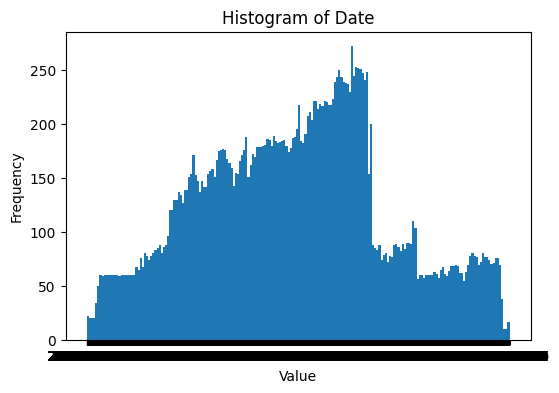

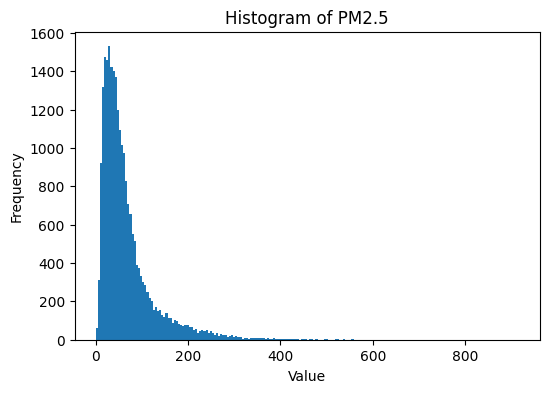

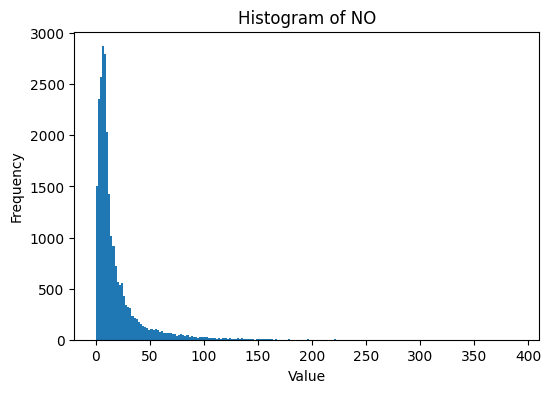

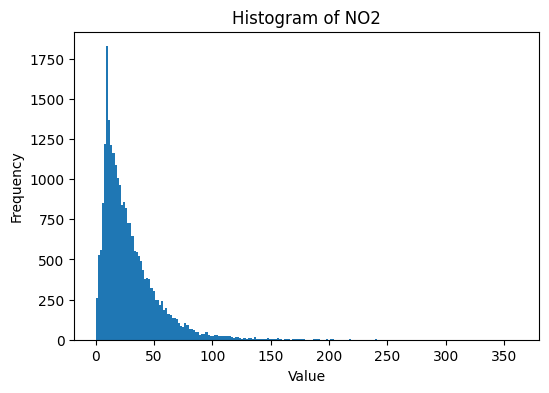

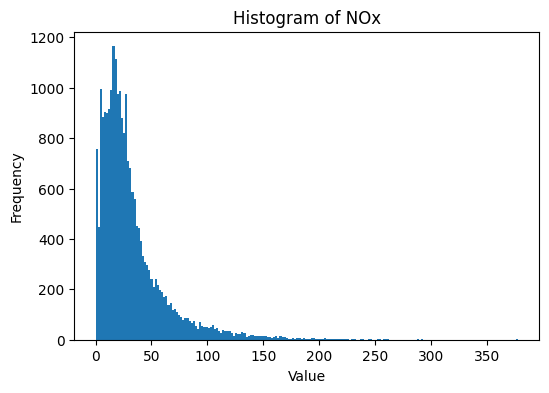

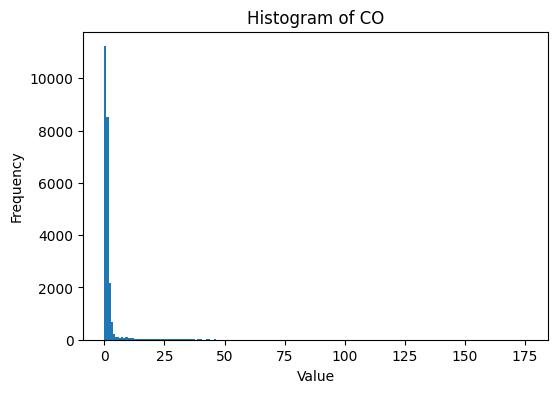

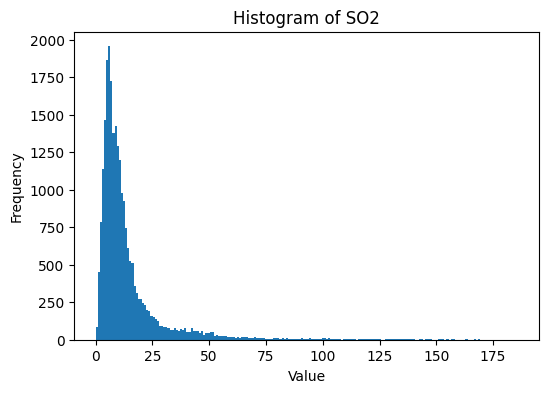

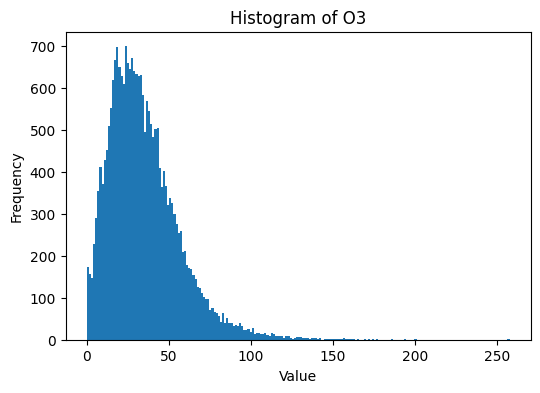

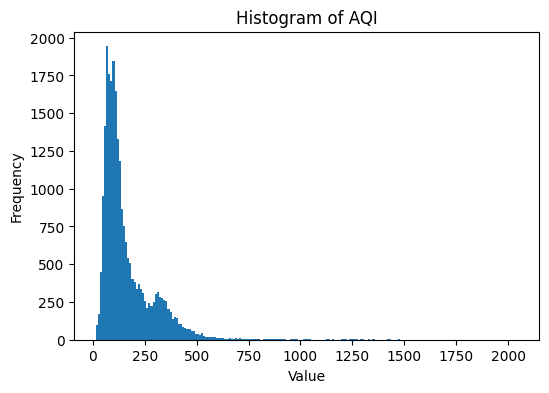

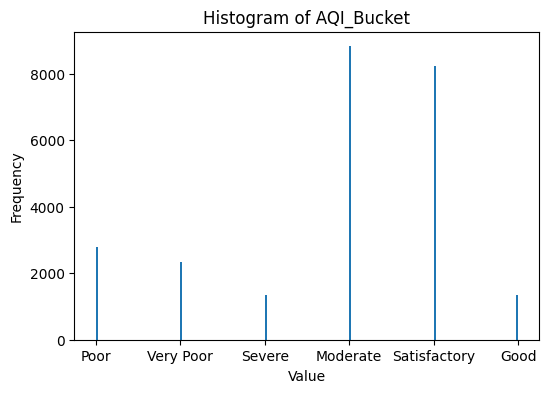

In [ ]:
for column in df_north.iloc[:,2:]:
    plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
    plt.hist(df[column], bins=200)  # Adjust the number of bins as needed
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

### Ready for model run

In [ ]:
df_north.tail()

,index,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI,AQI_Bucket
11654,21924,Shillong,2020-06-27,9.41,0.99,2.89,1.16,0.16,4.76,24.97,35.0,Good
11655,21925,Shillong,2020-06-28,13.55,1.07,3.10,1.25,0.17,5.00,34.91,53.0,Satisfactory
11656,21926,Shillong,2020-06-29,9.53,1.07,3.05,1.22,0.18,5.33,10.85,26.0,Good
11657,21927,Shillong,2020-06-30,14.74,1.01,2.85,1.12,0.20,5.05,6.20,21.0,Good
11658,21928,Shillong,2020-07-01,16.70,0.97,2.70,1.04,0.10,4.29,17.71,24.0,Good


In [ ]:
minmax_north = df_north.groupby('AQI_Bucket')['AQI'].agg([min, max])

minmax_north = minmax_north.rename(columns={'min': 'MinValue', 'max': 'MaxValue'})

print(minmax_north)

              MinValue  MaxValue
AQI_Bucket                      
Good              14.0      50.0
Moderate         101.0     200.0
Poor             201.0     300.0
Satisfactory      51.0     100.0
Severe           401.0     956.0
Very Poor        301.0     400.0


In [ ]:
minmax_south = df_south.groupby('AQI_Bucket')['AQI'].agg([min, max])

minmax_south = minmax_south.rename(columns={'min': 'MinValue', 'max': 'MaxValue'})

print(minmax_south)

              MinValue  MaxValue
AQI_Bucket                      
Good              13.0      50.0
Moderate         101.0     200.0
Poor             201.0     300.0
Satisfactory      51.0     100.0
Severe           401.0    2049.0
Very Poor        301.0     400.0


Classification :

Good : 0-50

Satisfactory : 51-100

Moderate : 101-200

Poor : 201-300

Very Poor : 301-400

Severe : 401-2500

**Splitting data into train, validation and test sets**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_north = df_north.iloc[:,3:10]    # input features from PM2.5 to O3
y_north = df_north['AQI']          # AQI numerical values
yc_north = df_north['AQI_Bucket']  # AQI categorical values (6)

In [ ]:
X_south = df_south.iloc[:,3:10]
y_south = df_south['AQI']
yc_south = df_south['AQI_Bucket']

In [ ]:
scaler = StandardScaler()
Xn_scaled = scaler.fit_transform(X_north)
Xs_scaled = scaler.fit_transform(X_south)

In [ ]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn_scaled, y_north, test_size=0.3, random_state=42)
_,_, yn_val_train, yn_val_test = train_test_split(Xn_scaled, yc_north, test_size=0.3, random_state=42)

print("X_train shape:", Xn_train.shape)
print("X_test shape:", Xn_test.shape)
print("y_train shape:", yn_train.shape)
print("y_test shape:", yn_test.shape)
print("y_val_train shape:", yn_val_train.shape)
print("y_val_test shape:", yn_val_test.shape)

X_train shape: (8161, 7)
X_test shape: (3498, 7)
y_train shape: (8161,)
y_test shape: (3498,)
y_val_train shape: (8161,)
y_val_test shape: (3498,)


In [ ]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs_scaled, y_south, test_size=0.3, random_state=42)
_, _, ys_val_train, ys_val_test = train_test_split(Xs_scaled, yc_south, test_size=0.3, random_state=42)

print("X_train shape:", Xs_train.shape)
print("X_test shape:", Xs_test.shape)
print("y_train shape:", ys_train.shape)
print("y_test shape:", ys_test.shape)
print("y_val_train shape:", ys_val_train.shape)
print("y_val_test shape:", ys_val_test.shape)

X_train shape: (9233, 7)
X_test shape: (3958, 7)
y_train shape: (9233,)
y_test shape: (3958,)
y_val_train shape: (9233,)
y_val_test shape: (3958,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
intervals = [0, 50, 100, 200, 300, 400, 2500]
labels = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']
symptoms = [' Air quality is good in this range, and most people will not experience any symptoms','experience mild symptoms like coughing or throat irritation','Coughing, Shortness of breath, or Chest discomfort','Respiratory conditions, including shortness of breath, coughing, and chest tightness','Respiratory symptoms for most individuals, including coughing, throat irritation, and difficulty breathing','Severe respiratory distress for everyone, even healthy individuals']

diseases = ['None','mild symptoms of allergies and sinusitis\nAsthma symptoms can be aggravated','Respiratory Infections','Exacerbation of asthma,Chronic Obstructive Pulmonary and increased cardiovascular diseases','Exacerbation of respiratory diseases, cardiovascular issues, and general health risks','Severe risk of heart attacks and respiratory diseases']

precautions = ['Enjoy outdoor activities and open-air exercise','Sensitive individuals should reduce outdoor activities during periods of elevated AQI',
              'People with asthma and heart conditions should limit outdoor activities\nConsider using air purifiers indoors',
               'Minimize outdoor activities, especially for children, the elderly, and individuals with pre-existing conditions\nUse N95 or equivalent masks if outdoor exposure is unavoidable\nCreate a clean indoor environment with air purifiers and keep windows closed',
               'Stay indoors as much as possible, and keep windows and doors sealed\nUse air purifiers with HEPA filters\nVulnerable populations, like children and the elderly, should take extra precautions',
               'Wear N95 or higher-rated masks if you must go outside, although its best to avoid outdoor exposure\nSeek immediate medical attention for severe symptoms.']

In [ ]:
def accuracy_score(y_true, y_pred):
    if y_true.shape != y_pred.shape:
        raise ValueError("Input arrays must have the same shape")

    # Calculate the accuracy
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions

    return accuracy

##### Linear Regression

In [ ]:
## yn1tn - y-data, n-north, 1-model number, tn-train data
## ys3tt - y-data, s-south, 3-model number, tt-test data

In [ ]:
modeln1 = LinearRegression()

modeln1.fit(Xn_train, yn_train)

yn1tn_pred = modeln1.predict(Xn_train)
yn1tt_pred = modeln1.predict(Xn_test)

mse_n1 = mean_squared_error(yn_test, yn1tt_pred)
r2_n1 = r2_score(yn_test, yn1tt_pred)

print("Coefficients:", modeln1.coef_)
print("Intercept:", modeln1.intercept_)
print("Mean Squared Error:", mse_n1)
print("R-squared:", r2_n1)

Coefficients: [93.25763879  1.41136581  4.46157436  9.74706356 11.76129544  6.20145633
 10.31584989]
Intercept: 191.49767365012002
Mean Squared Error: 2726.7661873380316
R-squared: 0.8102139591612361


In [ ]:
yn1tn_cls = np.array(pd.cut(yn1tn_pred, bins=intervals, labels=labels))
yn1tt_cls = np.array(pd.cut(yn1tt_pred, bins=intervals, labels=labels))
sym_cls = np.array(pd.cut(yn1tt_pred, bins=intervals, labels=symptoms))
dis_cls = np.array(pd.cut(yn1tn_pred, bins=intervals, labels=diseases))
pre_cls = np.array(pd.cut(yn1tn_pred, bins=intervals, labels=precautions))


In [ ]:
print("Enter the values between 0-2500")
AQI_example = int(input("Enter a AQI Value:"))
cls = pd.cut([AQI_example], bins=intervals, labels=labels)
sym = pd.cut([AQI_example], bins=intervals, labels=symptoms)
dis = pd.cut([AQI_example], bins=intervals, labels=diseases)
pre = pd.cut([AQI_example], bins=intervals, labels=precautions)
print("\nAQI_Bucket:")
print(cls[0])

print("\nSymptoms:")
print(sym[0])

print("\nDiseases:")
print(dis[0])

print("\nPrecautions:")
print(pre[0])

Enter the values between 0-2500
Enter a AQI Value:200

AQI_Bucket:
Moderate

Symptoms:
Coughing, Shortness of breath, or Chest discomfort

Diseases:
Respiratory Infections

Precautions:
People with asthma and heart conditions should limit outdoor activities
Consider using air purifiers indoors


In [ ]:
print(yn1tn_cls)

['Poor' 'Poor' 'Poor' ... 'Poor' 'Moderate' 'Moderate']


In [ ]:
print(yn1tn_pred)

[283.55896439 246.3604004  245.80226545 ... 234.14283667 143.77952966
 139.11182885]


In [ ]:
print(dis_cls)

['Exacerbation of asthma,Chronic Obstructive Pulmonary and increased cardiovascular diseases'
 'Exacerbation of asthma,Chronic Obstructive Pulmonary and increased cardiovascular diseases'
 'Exacerbation of asthma,Chronic Obstructive Pulmonary and increased cardiovascular diseases'
 ...
 'Exacerbation of asthma,Chronic Obstructive Pulmonary and increased cardiovascular diseases'
 'Respiratory Infections' 'Respiratory Infections']


In [ ]:
acc_n1tn = accuracy_score(yn_val_train, yn1tn_cls)
print("Accuracy Score:", acc_n1tn)

acc_n1tt = accuracy_score(yn_val_test, yn1tt_cls)
print("Accuracy Score:", acc_n1tt)

Accuracy Score: 0.6089939958338438
Accuracy Score: 0.6203544882790166


In [ ]:
models1 = LinearRegression()

models1.fit(Xs_train, ys_train)

ys1tn_pred = models1.predict(Xs_train)
ys1tt_pred = models1.predict(Xs_test)

mse_s1 = mean_squared_error(ys_test, ys1tt_pred)
r2_s1 = r2_score(ys_test, ys1tt_pred)

print("Coefficients:", models1.coef_)
print("Intercept:", models1.intercept_)
print("Mean Squared Error:", mse_s1)
print("R-squared:", r2_s1)

Coefficients: [ 43.9404843    4.85987822   8.50970544  -3.62364971 107.93669651
  17.60871042   3.12154787]
Intercept: 144.7356236524405
Mean Squared Error: 4268.043990311957
R-squared: 0.8297421345361442


In [ ]:
ys1tn_cls = np.array(pd.cut(ys1tn_pred, bins=intervals, labels=labels))
ys1tt_cls = np.array(pd.cut(ys1tt_pred, bins=intervals, labels=labels))

In [ ]:
acc_s1tn = accuracy_score(ys_val_train, ys1tn_cls)
print("Accuracy Score:", acc_s1tn)

acc_s1tt = accuracy_score(ys_val_test, ys1tt_cls)
print("Accuracy Score:", acc_s1tt)

Accuracy Score: 0.7173183147406044
Accuracy Score: 0.7230924709449217


##### Random Forest Regressor

In [ ]:
modeln2 = RandomForestRegressor(n_estimators=100, random_state=42)

modeln2.fit(Xn_train, yn_train)

yn2tn_pred = modeln2.predict(Xn_train)
yn2tt_pred = modeln2.predict(Xn_test)

mse_n2 = mean_squared_error(yn_test, yn2tt_pred)
r2_n2 = r2_score(yn_test, yn2tt_pred)

print("Mean Squared Error:", mse_n2)
print("R-squared:", r2_n2)

Mean Squared Error: 1436.996272052074
R-squared: 0.8999834182926159


In [ ]:
yn2tn_cls = np.array(pd.cut(yn2tn_pred, bins=intervals, labels=labels))
yn2tt_cls = np.array(pd.cut(yn2tt_pred, bins=intervals, labels=labels))

In [ ]:
acc_n2tn = accuracy_score(yn_val_train, yn2tn_cls)
print("Accuracy Score:", acc_n2tn)

acc_n2tt = accuracy_score(yn_val_test, yn2tt_cls)
print("Accuracy Score:", acc_n2tt)

Accuracy Score: 0.895355961279255
Accuracy Score: 0.7489994282447112


In [ ]:
models2 = RandomForestRegressor(n_estimators=100, random_state=42)

models2.fit(Xs_train, ys_train)

ys2tn_pred = models2.predict(Xs_train)
ys2tt_pred = models2.predict(Xs_test)

mse_s2 = mean_squared_error(ys_test, ys2tt_pred)
r2_s2 = r2_score(ys_test, ys2tt_pred)

print("Mean Squared Error:", mse_s2)
print("R-squared:", r2_s2)

Mean Squared Error: 3020.29352735225
R-squared: 0.879516534925942


In [ ]:
ys2tn_cls = np.array(pd.cut(ys2tn_pred, bins=intervals, labels=labels))
ys2tt_cls = np.array(pd.cut(ys2tt_pred, bins=intervals, labels=labels))

In [ ]:
acc_s2tn = accuracy_score(ys_val_train, ys2tn_cls)
print("Accuracy Score:", acc_s2tn)

acc_s2tt = accuracy_score(ys_val_test, ys2tt_cls)
print("Accuracy Score:", acc_s2tt)

Accuracy Score: 0.9120545868081881
Accuracy Score: 0.781455280444669


##### SVM

In [ ]:
modeln3 = SVR(kernel='linear', C=1.0)

modeln3.fit(Xn_train, yn_train)

yn3tn_pred = modeln3.predict(Xn_train)
yn3tt_pred = modeln3.predict(Xn_test)

mse_n3 = mean_squared_error(yn_test, yn3tt_pred)
r2_n3 = r2_score(yn_test, yn3tt_pred)

print("Mean Squared Error:", mse_n3)
print("R-squared:", r2_n3)

Mean Squared Error: 3070.865799021244
R-squared: 0.7862642331969184


In [ ]:
yn3tn_cls = np.array(pd.cut(yn3tn_pred, bins=intervals, labels=labels))
yn3tt_cls = np.array(pd.cut(yn3tt_pred, bins=intervals, labels=labels))

In [ ]:
acc_n3tn = accuracy_score(yn_val_train, yn3tn_cls)
print("Accuracy Score:", acc_n3tn)

acc_n3tt = accuracy_score(yn_val_test, yn3tt_cls)
print("Accuracy Score:", acc_n3tt)

Accuracy Score: 0.6739370175223625
Accuracy Score: 0.6841052029731275


In [ ]:
models3 = SVR(kernel='linear', C=1.0)

models3.fit(Xs_train, ys_train)

ys3tn_pred = models3.predict(Xs_train)
ys3tt_pred = models3.predict(Xs_test)

mse_s3 = mean_squared_error(ys_test, ys3tt_pred)
r2_s3 = r2_score(ys_test, ys3tt_pred)

print("Mean Squared Error:", mse_s3)
print("R-squared:", r2_s3)

Mean Squared Error: 4523.934669807952
R-squared: 0.8195343201410776


In [ ]:
ys3tn_cls = np.array(pd.cut(ys3tn_pred, bins=intervals, labels=labels))
ys3tt_cls = np.array(pd.cut(ys3tt_pred, bins=intervals, labels=labels))

In [ ]:
acc_s3tn = accuracy_score(ys_val_train, ys3tn_cls)
print("Accuracy Score:", acc_s3tn)

acc_s3tt = accuracy_score(ys_val_test, ys3tt_cls)
print("Accuracy Score:", acc_s3tt)

Accuracy Score: 0.7278241091736164
Accuracy Score: 0.7397675593734209


##### Gradient Boosting

In [ ]:
modeln4 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

modeln4.fit(Xn_train, yn_train)

yn4tn_pred = modeln4.predict(Xn_train)
yn4tt_pred = modeln4.predict(Xn_test)

mse_n4 = mean_squared_error(yn_test, yn4tt_pred)
r2_n4 = r2_score(yn_test, yn4tt_pred)

print("Mean Squared Error:", mse_n4)
print("R-squared:", r2_n4)

Mean Squared Error: 1492.872156979357
R-squared: 0.8960943928866408


In [ ]:
yn4tn_cls = np.array(pd.cut(yn4tn_pred, bins=intervals, labels=labels))
yn4tt_cls = np.array(pd.cut(yn4tt_pred, bins=intervals, labels=labels))

In [ ]:
acc_n4tn = accuracy_score(yn_val_train, yn4tn_cls)
print("Accuracy Score:", acc_n4tn)

acc_n4tt = accuracy_score(yn_val_test, yn4tt_cls)
print("Accuracy Score:", acc_n4tt)

Accuracy Score: 0.7361842911407915
Accuracy Score: 0.7332761578044596


In [ ]:
models4 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

models4.fit(Xs_train, ys_train)

ys4tn_pred = models4.predict(Xs_train)
ys4tt_pred = models4.predict(Xs_test)

mse_s4 = mean_squared_error(ys_test, ys4tt_pred)
r2_s4 = r2_score(ys_test, ys4tt_pred)

print("Mean Squared Error:", mse_s4)
print("R-squared:", r2_s4)

Mean Squared Error: 3043.4927217343657
R-squared: 0.8785910886735262


In [ ]:
ys4tn_cls = np.array(pd.cut(ys4tn_pred, bins=intervals, labels=labels))
ys4tt_cls = np.array(pd.cut(ys4tt_pred, bins=intervals, labels=labels))

In [ ]:
acc_s4tn = accuracy_score(ys_val_train, ys4tn_cls)
print("Accuracy Score:", acc_s4tn)

acc_s4tt = accuracy_score(ys_val_test, ys4tt_cls)
print("Accuracy Score:", acc_s4tt)

Accuracy Score: 0.7516516841763241
Accuracy Score: 0.7453259221829207


In [ ]:
# North data metrics
model_names = ['Linear Regression','Random Forest Regressor', 'SVM', 'Gradient Boosting']
R2_values = [r2_n1,r2_n2,r2_n3,r2_n4]
Accuracy_scores = [acc_n1tt,acc_n2tt,acc_n3tt,acc_n4tt]

metric_north = {'Model': model_names, 'R2 Score': R2_values, 'Accuracy': Accuracy_scores}
north_metric = pd.DataFrame(metric_north)

**Descriptive Analysis**

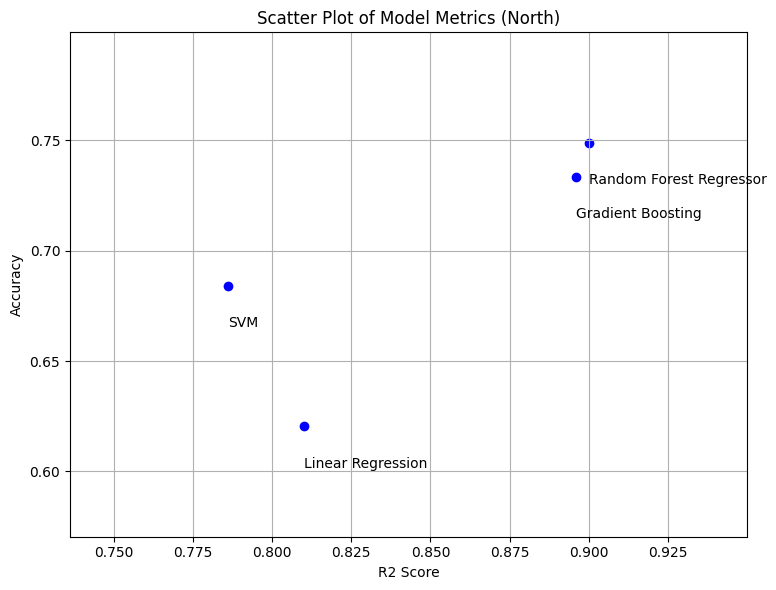

In [ ]:
plt.figure(figsize=(8, 6))

# Set limits for the x and y axes
plt.xlim(min(R2_values) - 0.05, max(R2_values) + 0.05)
plt.ylim(min(Accuracy_scores) - 0.05, max(Accuracy_scores) + 0.05)

# Iterate through the data points
for i, row in north_metric.iterrows():
    plt.scatter(row['R2 Score'], row['Accuracy'], c='b', marker='o')

    # Add labels for each point
    plt.text(row['R2 Score'], row['Accuracy'] - 0.02, row['Model'], fontsize=10, ha='left', va='bottom')

# Add labels and title
plt.xlabel('R2 Score')
plt.ylabel('Accuracy')
plt.title('Scatter Plot of Model Metrics (North)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# South data metrics
model_names = ['Linear Regression','Random Forest Regressor', 'SVM', 'Gradient Boosting']
R2s_values = [r2_s1,r2_s2,r2_s3,r2_s4]
Accuracys_scores = [acc_s1tt,acc_s2tt,acc_s3tt,acc_s4tt]

metric_south = {'Model': model_names, 'R2 Score': R2s_values, 'Accuracy': Accuracys_scores}
south_metric = pd.DataFrame(metric_south)

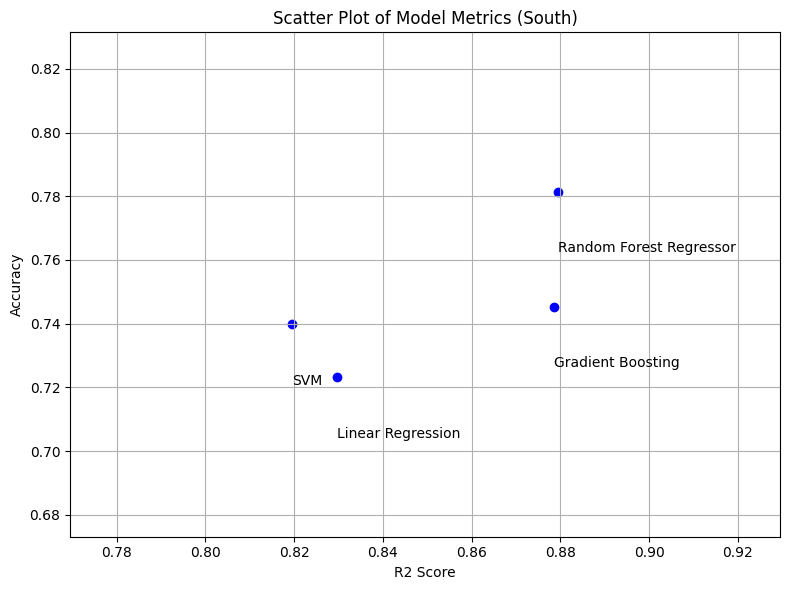

In [ ]:
plt.figure(figsize=(8, 6))

# Set limits for the x and y axes
plt.xlim(min(R2s_values) - 0.05, max(R2s_values) + 0.05)
plt.ylim(min(Accuracys_scores) - 0.05, max(Accuracys_scores) + 0.05)

# Iterate through the data points
for i, row in south_metric.iterrows():
    plt.scatter(row['R2 Score'], row['Accuracy'], c='b', marker='o')

    # Add labels for each point
    plt.text(row['R2 Score'], row['Accuracy'] - 0.02, row['Model'], fontsize=10, ha='left', va='bottom')

# Add labels and title
plt.xlabel('R2 Score')
plt.ylabel('Accuracy')
plt.title('Scatter Plot of Model Metrics (South)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pickle

with open('modelNorth.pkl', 'wb') as file:
    pickle.dump(modeln2, file)

with open('modelSouth.pkl', 'wb') as file:
    pickle.dump(models2, file)

# taking RFR model into pickle file for both North and South